In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv.zip to dataset.csv.zip


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/dataset.csv.zip")

# Show the first few rows to verify
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [3]:
# Check the column names in the dataset
print(df.columns)

Index(['Text', 'language'], dtype='object')


In [4]:
# Remove missing values
df.dropna(subset=['Text', 'language'], inplace=True)

# Split into features (text) and target (language)
X = df['Text']
y = df['language']


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels (languages)
y_encoded = label_encoder.fit_transform(y)

# Display the first few encoded labels
print(f"Encoded labels: {y_encoded[:5]}")


Encoded labels: [ 4 17 19 18  2]


In [6]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")


Training data size: 17600
Testing data size: 4400


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test).toarray()

print(f"Shape of training data: {X_train_tfidf.shape}")
print(f"Shape of testing data: {X_test_tfidf.shape}")


Shape of training data: (17600, 10000)
Shape of testing data: (4400, 10000)


In [8]:
from sklearn.metrics import accuracy_score, classification_report

In [10]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_preds = nb_model.predict(X_test_tfidf)
print(" Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds, target_names=label_encoder.classes_))

 Naive Bayes Results:
Accuracy: 0.9175
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.82      0.25      0.39       201
       Dutch       0.99      0.98      0.98       230
     English       0.72      1.00      0.83       194
    Estonian       0.98      0.95      0.97       200
      French       0.94      0.99      0.97       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       0.99      0.98      0.98       213
    Japanese       1.00      0.34      0.50       194
      Korean       0.99      0.98      0.99       190
       Latin       0.97      0.91      0.94       210
     Persian       0.99      0.99      0.99       196
   Portugese       0.99      0.97      0.98       194
      Pushto       1.00      0.96      0.98       196
    Romanian       0.99      0.98      0.99       197
     Russian       0.99      0.99      0.99       213
     Spanish       0.99      0.99      0.9

In [11]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

svm_preds = svm_model.predict(X_test_tfidf)
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds, target_names=label_encoder.classes_))

SVM Results:
Accuracy: 0.951590909090909
              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       202
     Chinese       0.58      0.93      0.72       201
       Dutch       1.00      0.99      0.99       230
     English       0.87      0.97      0.92       194
    Estonian       0.98      0.95      0.96       200
      French       0.95      0.98      0.97       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       0.99      0.99      0.99       213
    Japanese       0.83      0.37      0.51       194
      Korean       1.00      0.98      0.99       190
       Latin       0.96      0.96      0.96       210
     Persian       1.00      0.99      0.99       196
   Portugese       0.99      0.99      0.99       194
      Pushto       0.99      0.96      0.98       196
    Romanian       0.99      0.96      0.98       197
     Russian       0.99      0.98      0.98       213
     Spanish       0.99      0.98      0

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

rf_preds = rf_model.predict(X_test_tfidf)
print(" Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds, target_names=label_encoder.classes_))

 Random Forest Results:
Accuracy: 0.9484090909090909
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.56      0.96      0.71       201
       Dutch       1.00      0.98      0.99       230
     English       0.84      0.99      0.91       194
    Estonian       0.98      0.96      0.97       200
      French       0.96      0.97      0.97       188
       Hindi       1.00      0.98      0.99       208
  Indonesian       1.00      0.99      0.99       213
    Japanese       0.86      0.36      0.50       194
      Korean       1.00      0.96      0.98       190
       Latin       0.97      0.92      0.95       210
     Persian       1.00      0.99      0.99       196
   Portugese       0.98      0.99      0.98       194
      Pushto       1.00      0.96      0.98       196
    Romanian       0.99      0.97      0.98       197
     Russian       1.00      0.97      0.98       213
     Spanish       0.98     

In [13]:
# Store accuracy scores in a dictionary
model_scores = {
    "Naive Bayes": accuracy_score(y_test, nb_preds),
    "SVM": accuracy_score(y_test, svm_preds),
    "Random Forest": accuracy_score(y_test, rf_preds)
}

In [14]:
import pandas as pd

# Create a comparison DataFrame
comparison_df = pd.DataFrame(list(model_scores.items()), columns=["Model", "Accuracy"])

# Sort by accuracy (optional)
comparison_df.sort_values(by="Accuracy", ascending=False, inplace=True)

# Show the comparison table
print(comparison_df)


           Model  Accuracy
1            SVM  0.951591
2  Random Forest  0.948409
0    Naive Bayes  0.917500


In [15]:
# 1. Vectorize text
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 2. Train models
nb_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)
rf_model.fit(X_train_tfidf, y_train)

# 3. Predict
pred_nb = nb_model.predict(X_test_tfidf)
pred_svm = svm_model.predict(X_test_tfidf)
pred_rf = rf_model.predict(X_test_tfidf)


In [16]:
# Assuming you already trained them earlier like this:
nb_model = MultinomialNB()
svm_model = LinearSVC()
rf_model = RandomForestClassifier()

# Train them
nb_model.fit(X_train_tfidf, y_train)

svm_model.fit(X_train_tfidf, y_train)
rf_model.fit(X_train_tfidf, y_train)

# Evaluate and pick the best
nb_score = accuracy_score(y_test, nb_model.predict(X_test_tfidf))
svm_score = accuracy_score(y_test, svm_model.predict(X_test_tfidf))
rf_score = accuracy_score(y_test, rf_model.predict(X_test_tfidf))


# Choose best model
models = {'Naive Bayes': nb_model, 'SVM': svm_model, 'Random Forest': rf_model}
scores = {'Naive Bayes': nb_score, 'SVM': svm_score, 'Random Forest': rf_score}
best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]

print(f"✅ Best model is: {best_model_name} with accuracy {scores[best_model_name]:.2f}")

✅ Best model is: SVM with accuracy 0.95


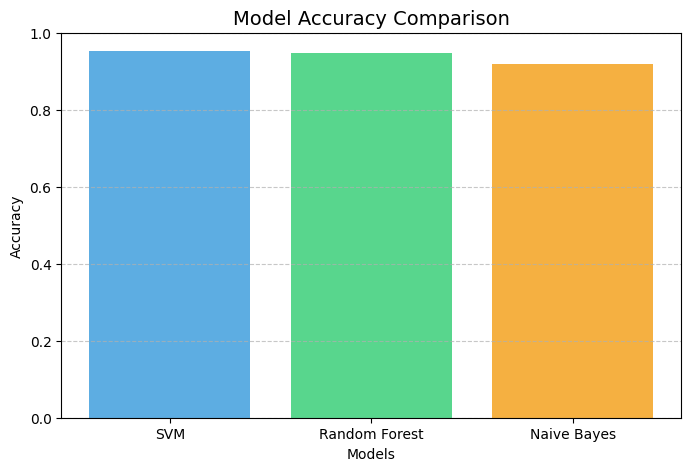

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(comparison_df["Model"], comparison_df["Accuracy"], color=["#5DADE2", "#58D68D", "#F5B041"])
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

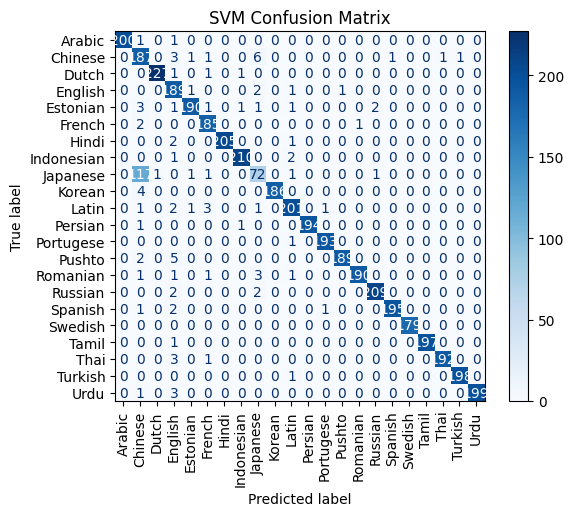

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot Confusion Matrix for best model (say SVM)
cm = confusion_matrix(y_test, svm_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

In [19]:
import joblib

# Save the model
joblib.dump(svm_model, 'language_detector_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

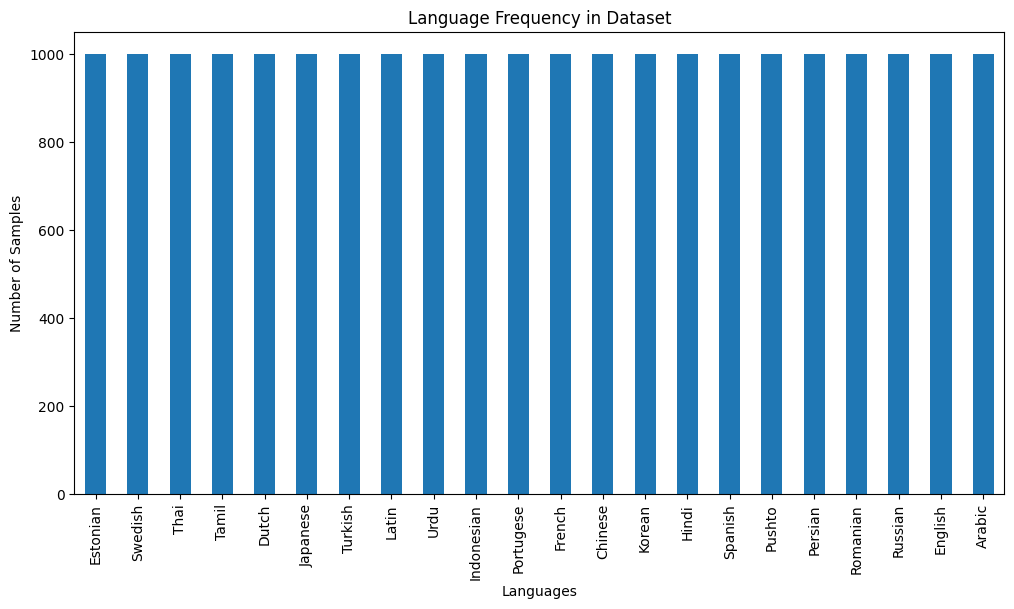

In [20]:
import matplotlib.pyplot as plt

df['language'].value_counts().plot(kind='bar', figsize=(12,6), title="Language Frequency in Dataset")
plt.xlabel("Languages")
plt.ylabel("Number of Samples")
plt.show()


In [21]:
import re

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    return text

# Apply cleaning
df['Text'] = df['Text'].apply(clean_text)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3), max_features=10000)
X = vectorizer.fit_transform(df['Text'])

In [23]:
from sklearn.model_selection import train_test_split

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['language'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# SVM
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [25]:
def predict_language(text):
    text = clean_text(text)
    vec = vectorizer.transform([text])
    prediction = svm_model.predict(vec)
    return label_encoder.inverse_transform(prediction)[0]

# Test inputs
test_samples = [
    "Bonjour, comment allez-vous aujourd'hui?",  # French
    "Hello, how are you doing today?",           # English
    "Wie geht es dir heute?",                    # German
    "Hola, ¿cómo estás?",                        # Spanish
    "今日はどうですか？",                          # Japanese
]

for sample in test_samples:
    print(f"Input: {sample} → Predicted Language: {predict_language(sample)}")


Input: Bonjour, comment allez-vous aujourd'hui? → Predicted Language: French
Input: Hello, how are you doing today? → Predicted Language: English
Input: Wie geht es dir heute? → Predicted Language: Dutch
Input: Hola, ¿cómo estás? → Predicted Language: Spanish
Input: 今日はどうですか？ → Predicted Language: Japanese


In [26]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_svm_model.pkl')

print("✅ Best SVM model saved successfully!")


✅ Best SVM model saved successfully!


In [27]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_svm_model.pkl')


['best_svm_model.pkl']

In [28]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.0 MB/s eta 0:00:00


In [29]:
import joblib

# Load the trained model
model = joblib.load('best_svm_model.pkl')  # Update with the correct path


In [ ]:
#def predict_language(text):
    # Assuming no preprocessing is required, otherwise, add preprocessing here

    #prediction = model.predict([text])
    #return prediction[0]


In [31]:
import joblib
import gradio as gr
import re

# Load trained model, vectorizer, and label encoder
model = joblib.load("best_svm_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# Text cleaning function (reuse from training)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

# Prediction function
def predict_language(text):
    try:
        if text.strip() == "":
            return " Please enter some text!"
        cleaned = clean_text(text)
        text_vector = vectorizer.transform([cleaned])
        prediction = model.predict(text_vector)
        language = label_encoder.inverse_transform(prediction)[0]
        return f"Predicted Language: {language}"
    except Exception as e:
        return f"Error: {str(e)}"

# Build Gradio Interface
interface = gr.Interface(
    fn=predict_language,
    inputs=gr.Textbox(lines=3, placeholder="Type something here..."),
    outputs=gr.Textbox(label="Prediction"),
    title="Language Detection App",
    description="Enter a sentence, and the model will predict its language.",
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9d1acd74437d11e52c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
